# Analysis on Netflix Movies & TV Shows

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

<IPython.core.display.Javascript object>

# Loading the Dataset

In [4]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Data Preparation and Cleaning

In [6]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [8]:
netflix_titles_df.isnull().values.any()

True

In [9]:
netflix_titles_df.isnull().sum().sum()

3036

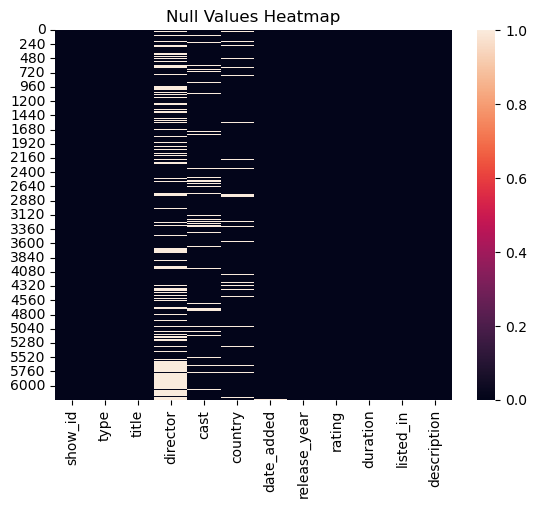

In [10]:
sns.heatmap(netflix_titles_df.isnull(), cbar=True)
plt.title('Null Values Heatmap')
plt.show()

In [11]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
netflix_titles_df.fillna({'director': 'No Director'}, inplace=True)
netflix_titles_df['director'] = netflix_titles_df['director'].fillna('No Director')
netflix_titles_df.fillna({'cast': 'No Cast'}, inplace=True)
netflix_titles_df['cast'] = netflix_titles_df['cast'].fillna('No Cast')
netflix_titles_df.fillna({'country': 'Country Unavailable'}, inplace=True)
netflix_titles_df['country'] = netflix_titles_df['country'].fillna('Country Unavailable')
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [13]:
netflix_titles_df.isnull().any()


show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [14]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [15]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [16]:
netflix_movies_df.duration = netflix_movies_df.duration.astype(str).str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season' : '1 Seasons'}}, inplace=True)
#netflix_shows_df["seasons"]=netflix_shows_df["seasons"].replace({'1 Season':'1 Seasons'}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.astype(str).str.replace(' Seasons','').astype(int)

# Exploratory Analysis and Visualization

In [18]:
netflix_titles_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


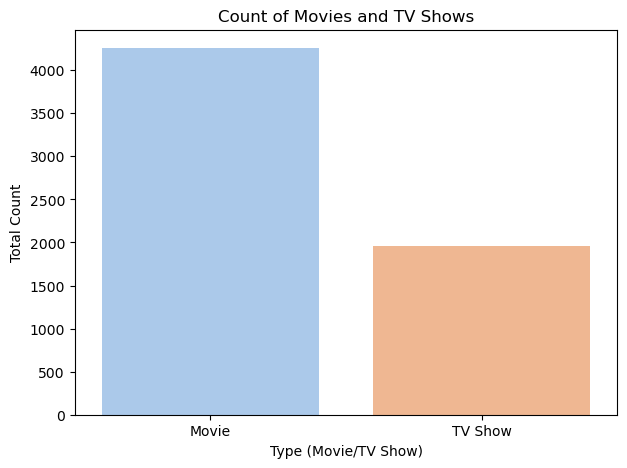

In [19]:
plt.figure(figsize=(7, 5))
g = sns.countplot(data=netflix_titles_df, x='type', hue='type', palette="pastel", dodge=False)
plt.legend([],[], frameon=False)  # Ẩn legend
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

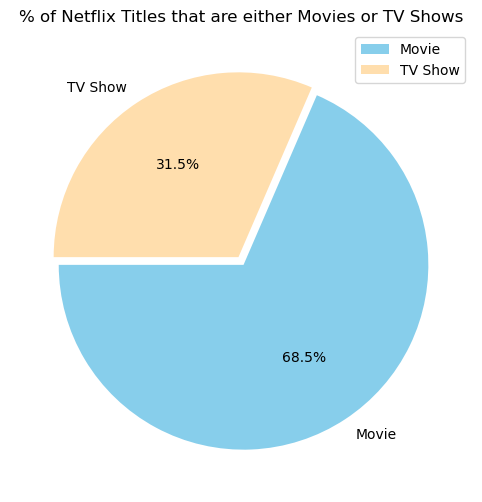

In [20]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_titles_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

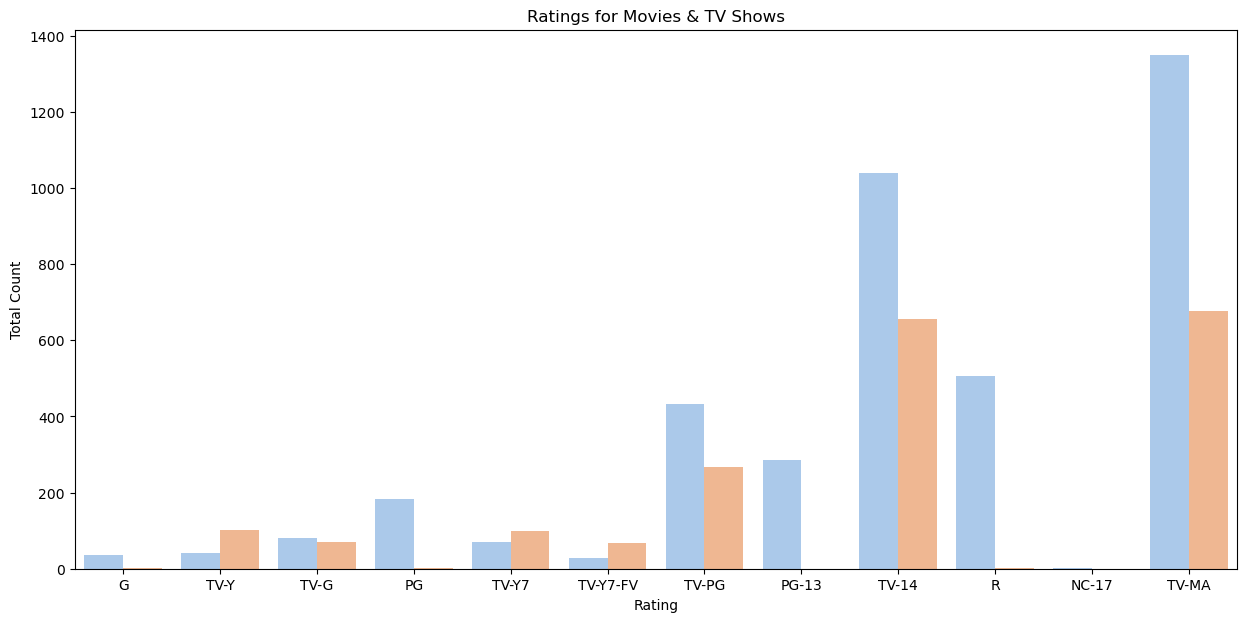

In [21]:
# Đặt thứ tự cho các hạng mục rating
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Tạo biểu đồ
plt.figure(figsize=(15, 7))
g = sns.countplot(data=netflix_titles_df, x='rating', hue='type', order=order, palette="pastel")
g.legend_.remove()  # Ẩn legend
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


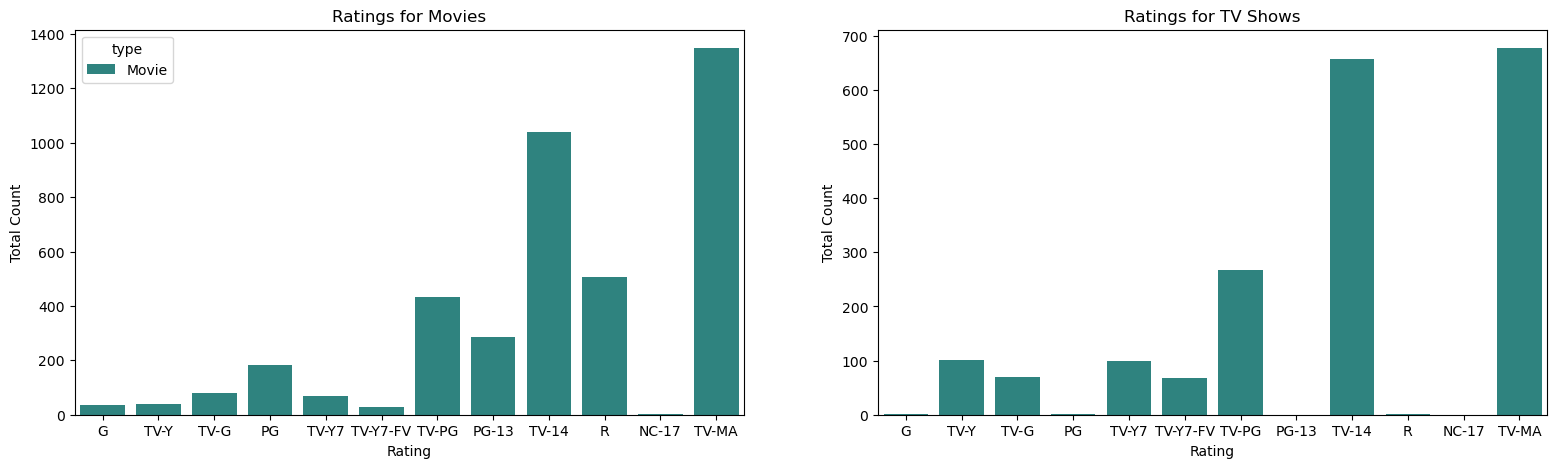

In [22]:
# Đặt thứ tự cho các hạng mục rating
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data=netflix_movies_df,x='rating',hue='type', order=order,palette='viridis', ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

g2 = sns.countplot(data=netflix_shows_df,x='rating',hue='type', order=order,palette='viridis', ax=ax[1]);
plt.legend([],[], frameon=False)  # Ẩn legend
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
plt.show()

In [23]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [24]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added':'year','count': 'count',})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

#cột đầu là yearadded => year, count giữ nguyên

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [25]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'year_added':'year','count': 'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'year_added':'year','count': 'count'})
show_year = show_year[show_year.year != 2020]

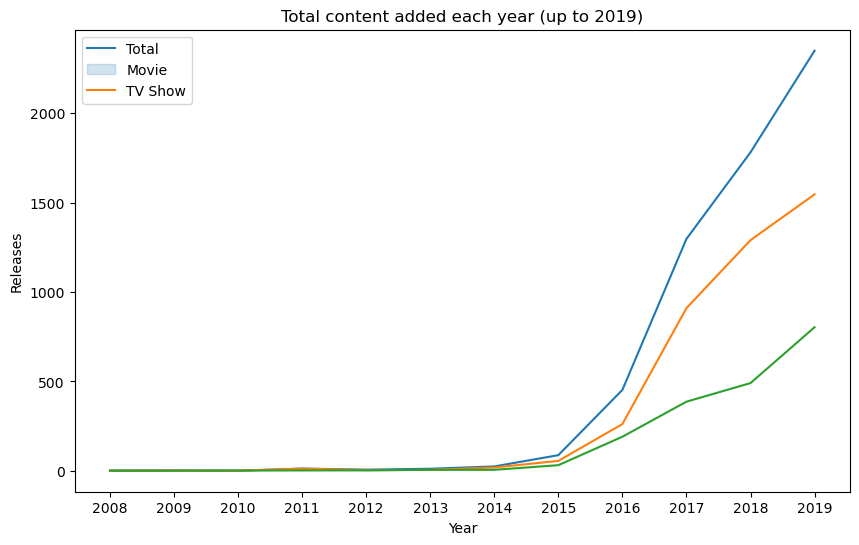

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

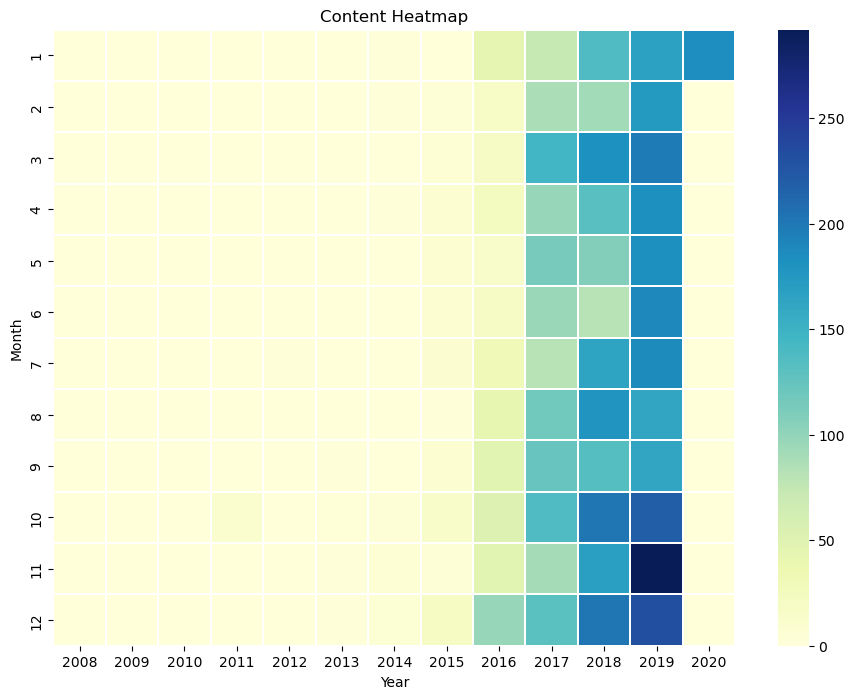

In [27]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

### Netflix Film Duration

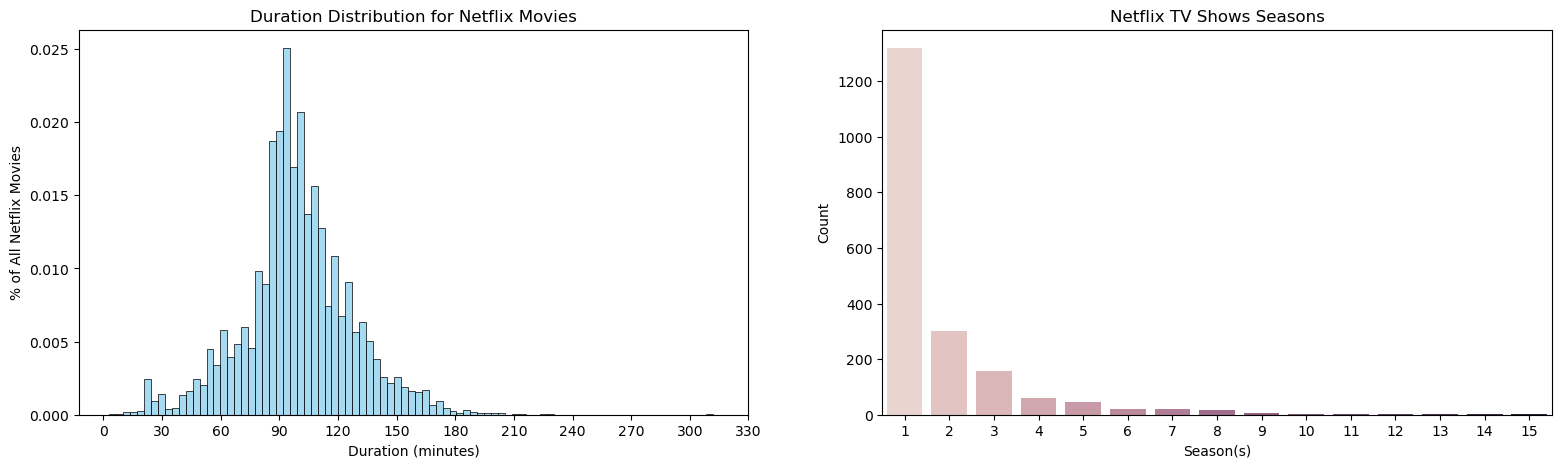

In [29]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(data=netflix_movies_df,x='duration',stat="density", color='skyblue',ax=ax[0]);
plt.legend([],[], frameon=False)  # Ẩn legend
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")


g2 = sns.countplot(data=netflix_shows_df,x='seasons',hue='seasons',ax=ax[1]);
plt.legend([],[], frameon=False)  # Ẩn legend
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
plt.show()



### Countries with the most content available

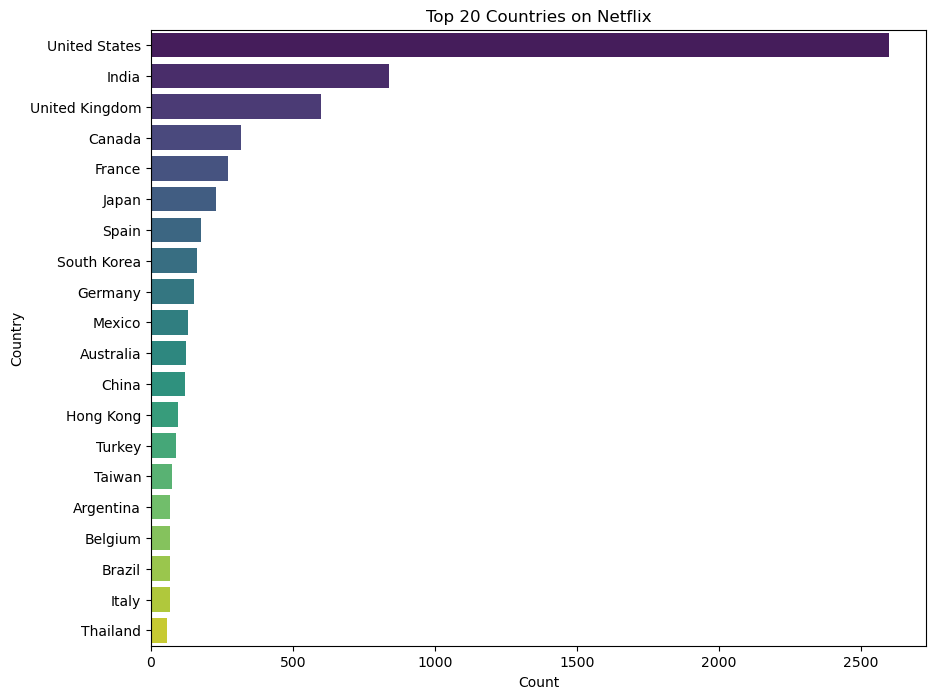

In [31]:
# Assuming filtered_countries is defined as before
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

# Count occurrences of each country
country_counts = filtered_countries.value_counts().sort_values(ascending=False)

# Select top 20 countries by count
top_countries = country_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index, palette='viridis')
plt.legend([],[], frameon=False)  # Ẩn legend
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Popular Genres

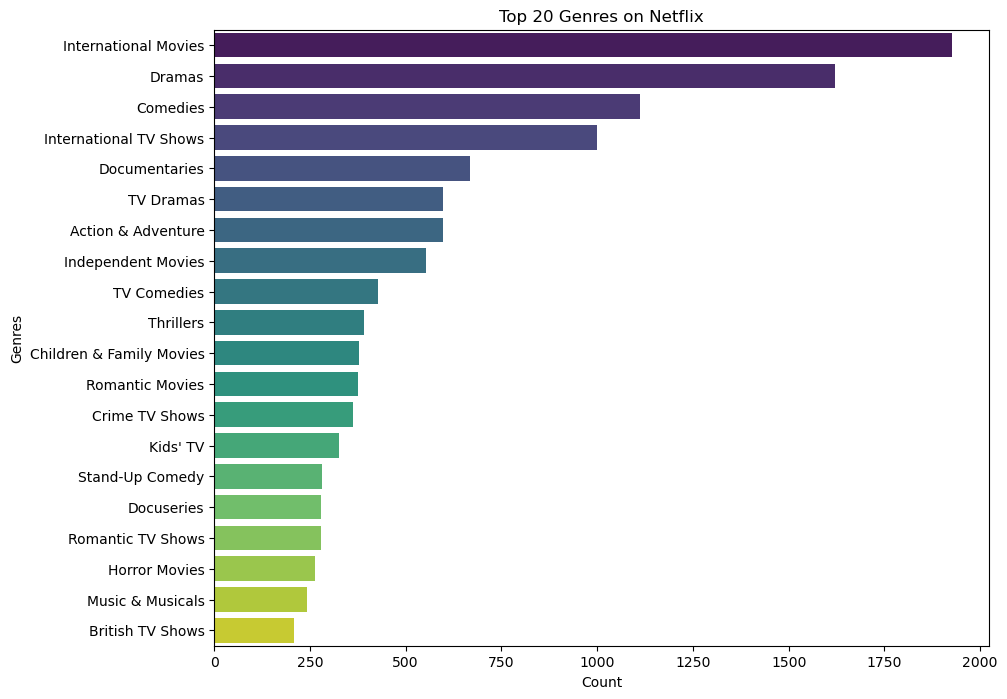

In [33]:
# Assuming filtered_genres is defined as before
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count occurrences of each genre
genre_counts = filtered_genres.value_counts().sort_values(ascending=False)

# Select top 20 genres by count
top_genres = genre_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_genres.values, y=top_genres.index,  hue=top_genres.index,palette='viridis')
plt.legend([],[], frameon=False)  # Ẩn legend
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

# Asking and Answering Questions

### Who are the top 10 directors on Netflix with the most releases?

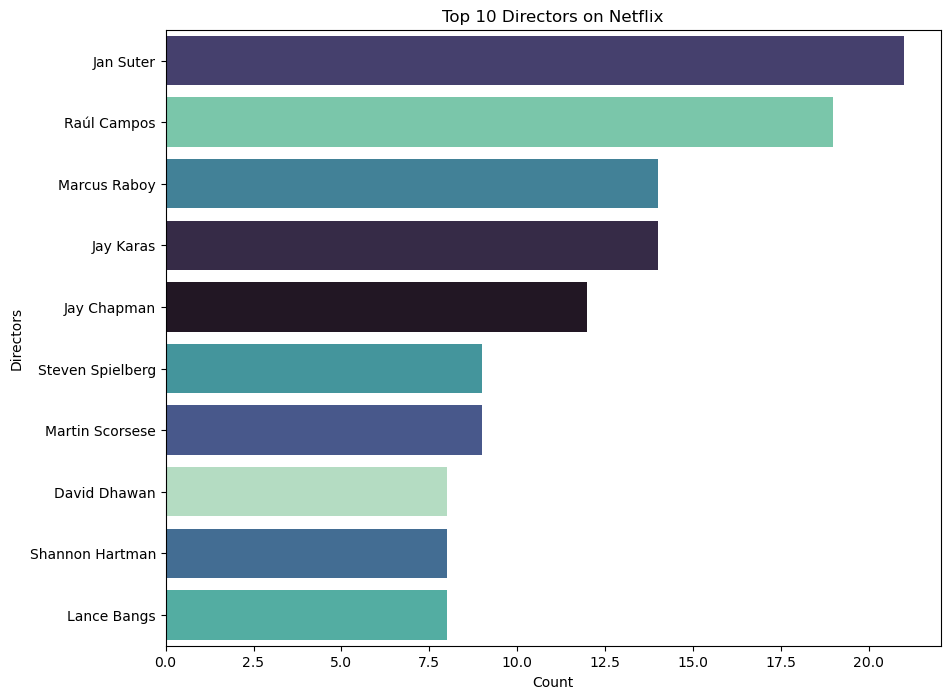

In [36]:
# Assuming filtered_directors is defined as before
filtered_directors = netflix_titles_df[netflix_titles_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count occurrences of each director
director_counts = filtered_directors.value_counts().sort_values(ascending=False)

# Select top 10 directors by count
top_directors = director_counts.head(10)

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(y=filtered_directors[filtered_directors.isin(top_directors.index)],hue=filtered_directors[filtered_directors.isin(top_directors.index)], order=top_directors.index, palette='mako')
plt.legend([],[], frameon=False)  # Ẩn legend
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

### Who are the top 10 actors on Netflix based on number of titles?

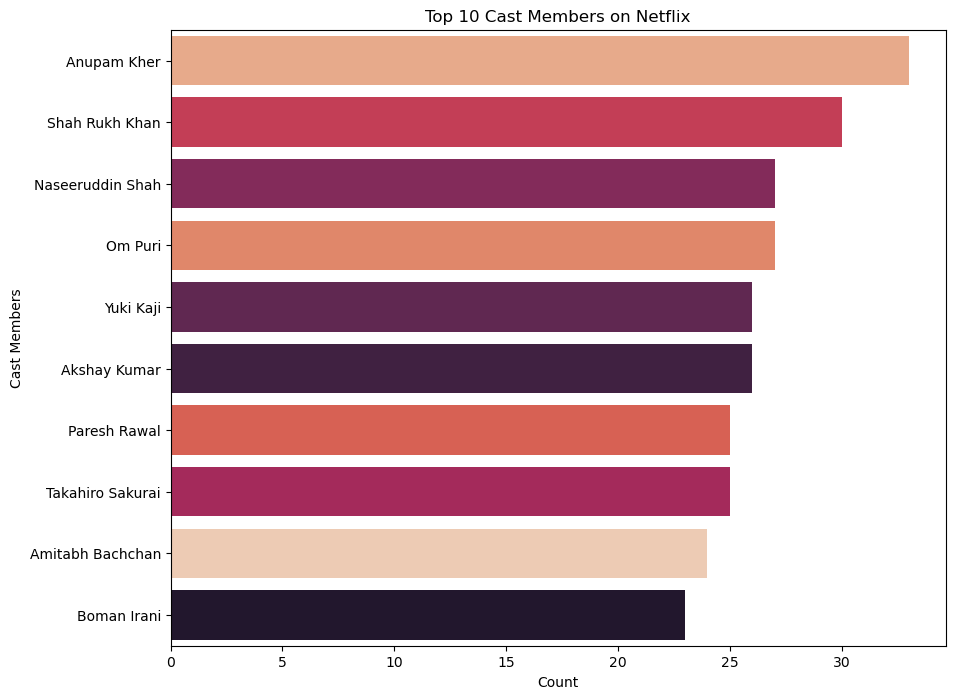

In [38]:

# Assuming filtered_cast is defined as before
filtered_cast = netflix_titles_df[netflix_titles_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count occurrences of each cast member
cast_counts = filtered_cast.value_counts().sort_values(ascending=False)

# Select top 10 cast members by count
top_cast = cast_counts.head(10)

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(y=filtered_cast[filtered_cast.isin(top_cast.index)],hue=filtered_cast[filtered_cast.isin(top_cast.index)], order=top_cast.index, palette='rocket')
plt.legend([],[], frameon=False)  # Ẩn legend
plt.title('Top 10 Cast Members on Netflix')
plt.xlabel('Count')
plt.ylabel('Cast Members')
plt.show()

### How does the timeline look like for the addition of International Movies compared to International TV Shows?

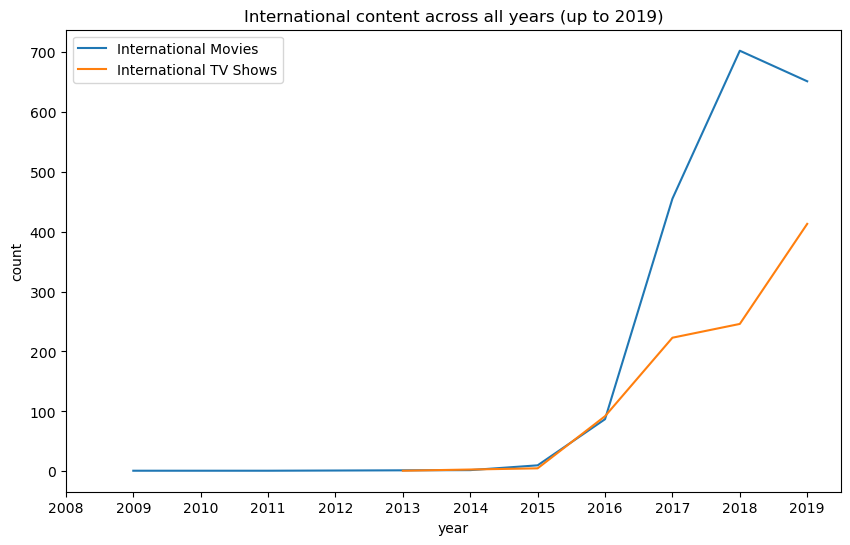

In [40]:
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added': 'year','conut':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added': 'year','conut':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
y1=sns.lineplot(data=intmov_year, x='year', y='count',label='International Movies')
sns.lineplot(data=intshow_year, x='year', y='count',label='International TV Shows')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend()
plt.show()

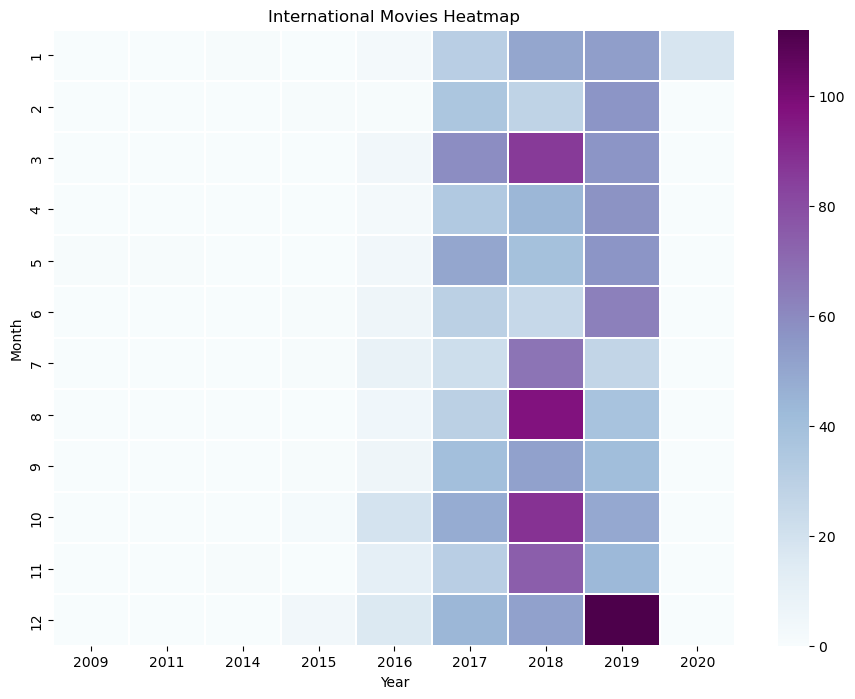

In [41]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

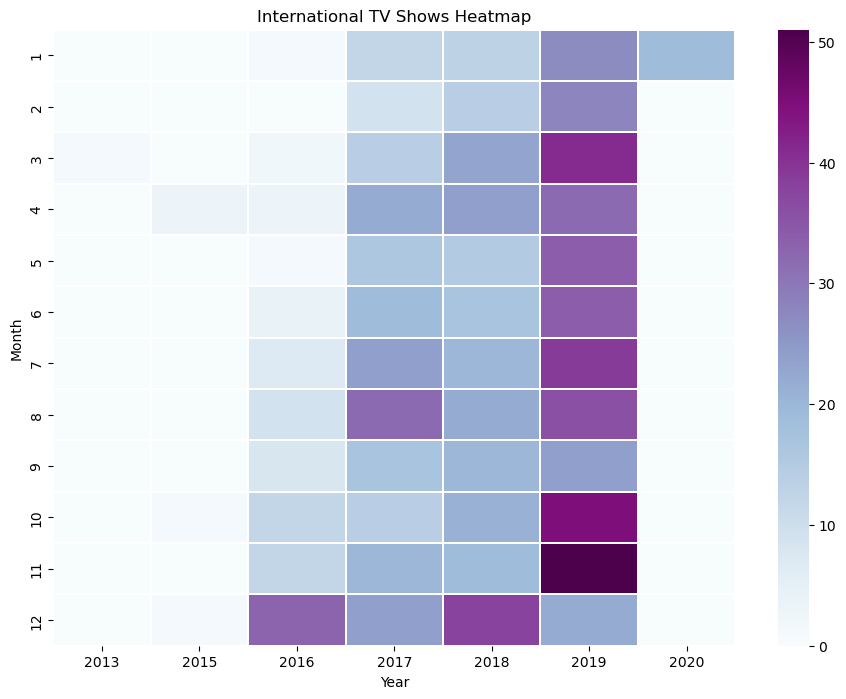

In [42]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()